In [1]:
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from mpl_toolkits import mplot3d
import cv2
import time

In [2]:
print(sns.__version__)

0.11.1


histograms in seaborn here: https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

In [3]:
save_location =  "../FLIR_Camera"
pdfCombined_figs_location  = "../FLIR_Camera/fastFlow_ShallowH_test1_centeredCame_flume_LookAngle_35Deg_PDFCOMBINED_FIGURES"

In [18]:
BEDFORMS = ['corals', 'canopy', 'rocks', 'dunes']
colors = {'corals':'dodgerblue','canopy':'green', 'rocks':'orange', 'dunes':'brown'}
bed_data = {}
for BEDFORM in BEDFORMS:
    data_filename = BEDFORM + "_fastFlow_ShallowH_test1.pickle"
    with open(os.path.join(save_location,data_filename), 'rb') as handle:
        all_data_dict_loaded = pickle.load(handle)
    bed_data[BEDFORM] = all_data_dict_loaded

KeyboardInterrupt: 

In [5]:
NUM_FRAMES = min([bed_data[BEDFORM]['all_height_maps'].shape[2] for BEDFORM in BEDFORMS])
H_MIN = 0.7*min([np.min(bed_data[BEDFORM]['all_height_maps']) for BEDFORM in BEDFORMS])
H_MAX = 0.7*max([np.max(bed_data[BEDFORM]['all_height_maps']) for BEDFORM in BEDFORMS])
SX_MIN = -1#min([np.min(bed_data[BEDFORM]['all_sx_maps']) for BEDFORM in beds])
SX_MAX = 1#max([np.max(bed_data[BEDFORM]['all_sx_maps']) for BEDFORM in beds])
SY_MIN = -1#min([np.min(bed_data[BEDFORM]['all_sy_maps']) for BEDFORM in beds])
SY_MAX = 1#max([np.max(bed_data[BEDFORM]['all_sy_maps']) for BEDFORM in beds])

## Plot pdf of the height field and slopes

In [6]:
height_df = {}
sx_df = {}
sy_df = {}

for BEDFORM in BEDFORMS:
    height_map = np.mean(np.real(bed_data[BEDFORM]['all_height_maps']), axis = (2))
    height_df[BEDFORM] = pd.Series(np.real(height_map).ravel())

    sx_map = np.mean(bed_data[BEDFORM]['all_sx_maps'], axis = (2))
    sx_df[BEDFORM] = pd.Series(sx_map.ravel())

    sy_map = np.mean(bed_data[BEDFORM]['all_sy_maps'], axis = (2))
    sy_df[BEDFORM] = pd.Series(sy_map.ravel())

In [7]:
temp  =[height_df[BEDFORM] for BEDFORM in BEDFORMS]
heights = pd.concat(temp, axis = 1)
heights.columns = BEDFORMS

temp  =[sx_df[BEDFORM] for BEDFORM in BEDFORMS]
sx = pd.concat(temp, axis = 1)
sx.columns = BEDFORMS

temp  =[sy_df[BEDFORM] for BEDFORM in BEDFORMS]
sy = pd.concat(temp, axis = 1)
sy.columns = BEDFORMS

In [19]:
del all_data_dict_loaded, bed_data, height_df, sx_df, sy_df

In [44]:
H_MIN = min(np.min(heights))
H_MAX = max(np.max(heights))
SX_MIN = min(np.min(sx))
SX_MAX = max(np.max(sx))
SY_MIN = min(np.min(sy))
SY_MAX = max(np.max(sy))

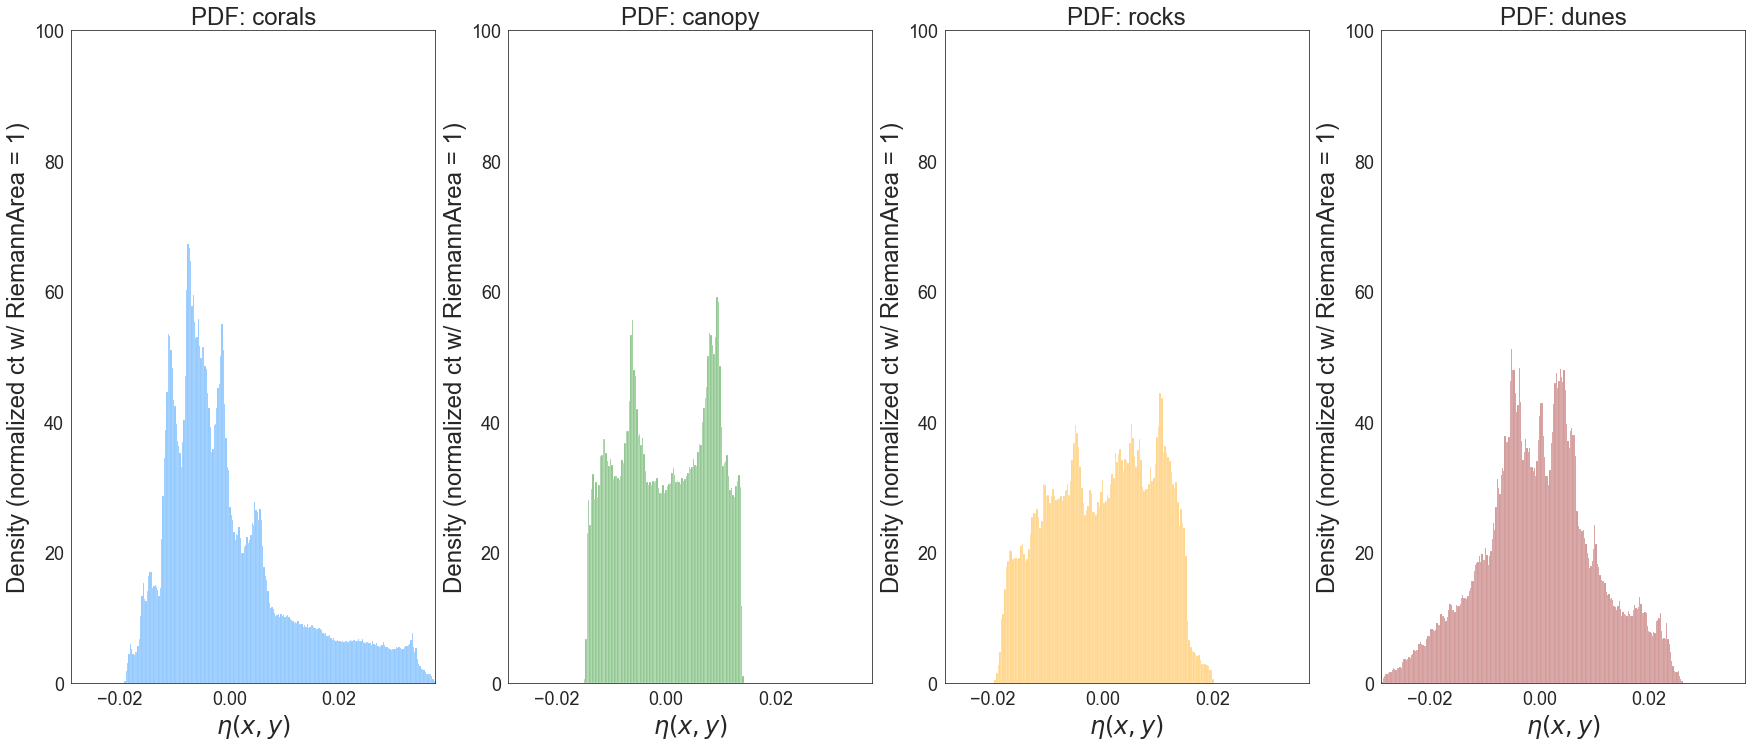

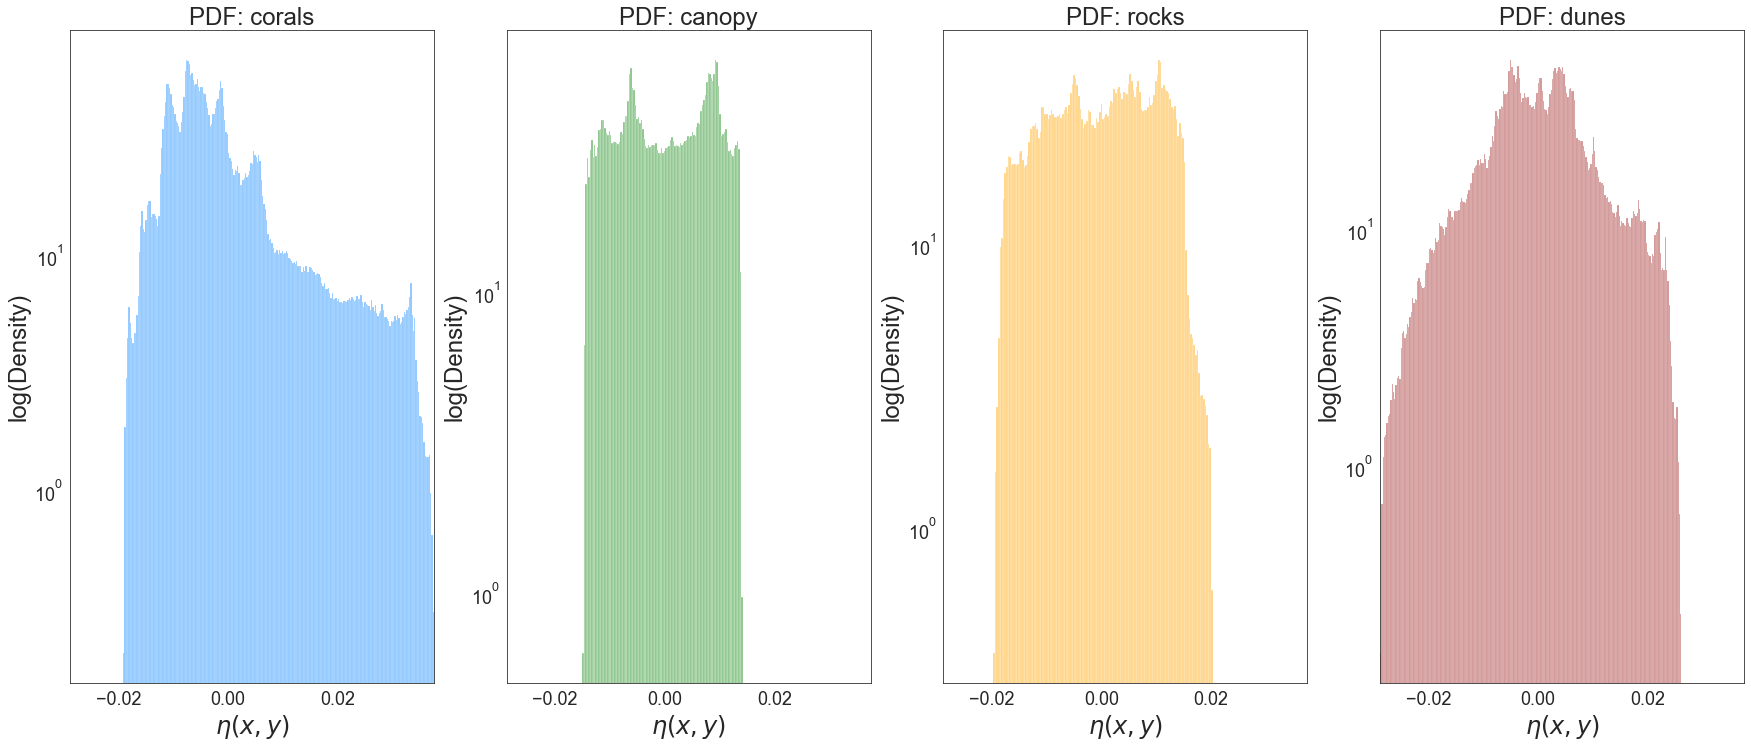

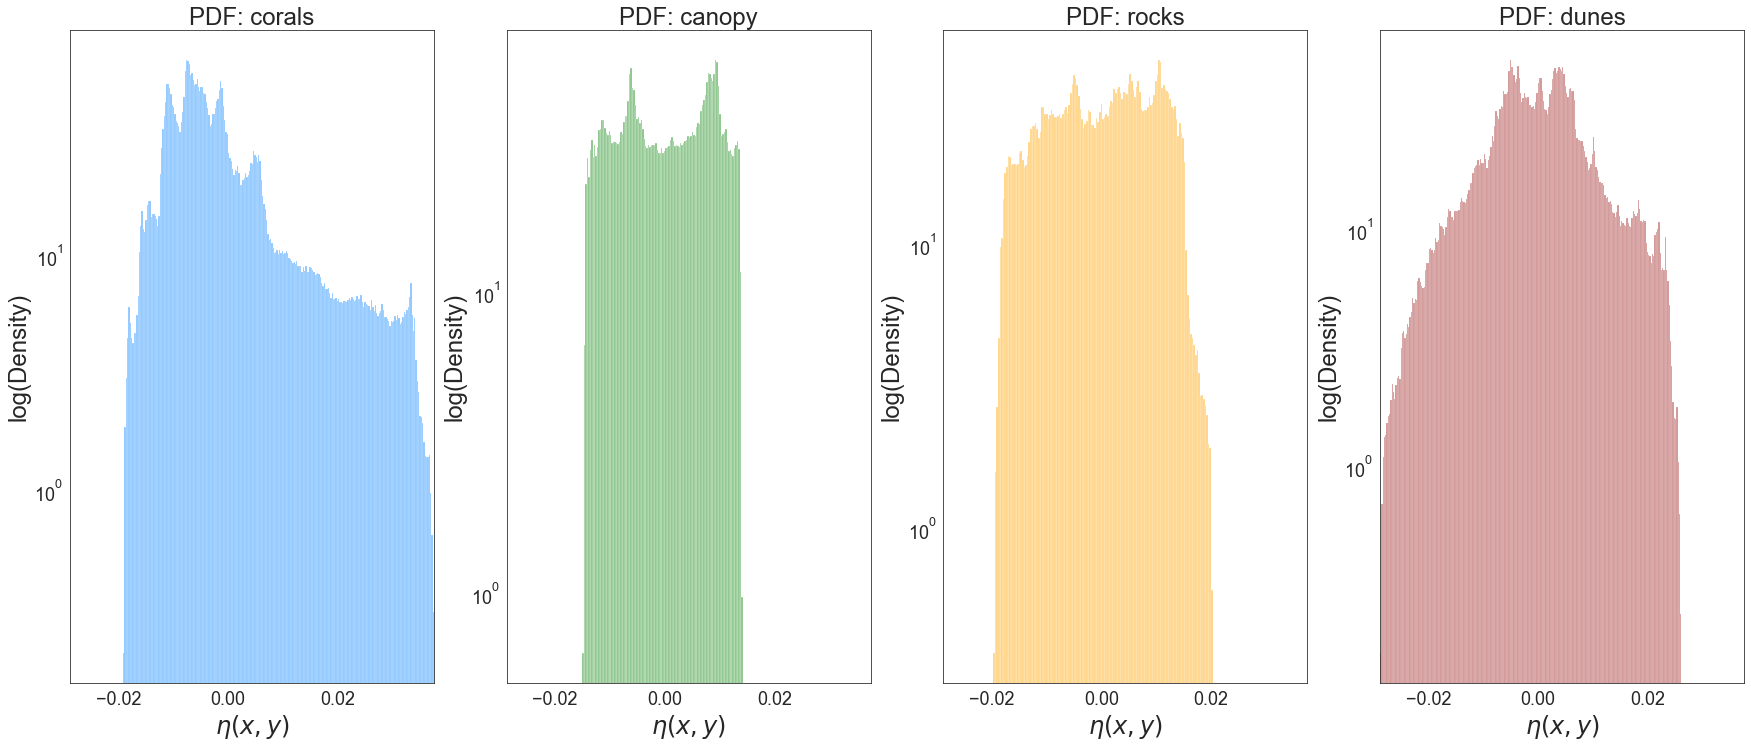

In [43]:
sns.set_style("white")
kwargs = dict({'alpha':.5})

fig = plt.figure(figsize =(30, 12))

for i, BEDFORM in enumerate(BEDFORMS):
    ax0 = fig.add_subplot(1, 4, i+1)
    sns.histplot(heights[BEDFORM], ax=ax0, color = colors[BEDFORM], \
                **kwargs, stat = "density", common_norm=False) #  log_scale=(False, True)
    ax0.set_title('PDF: {}'.format(BEDFORM), fontsize = 24)
    ax0.set_xlabel("$\eta(x,y)$", fontsize = 24)
    ax0.set_ylabel("Density (normalized ct w/ RiemannArea = 1)", fontsize = 24)
    ax0.tick_params(axis='x', labelsize= 18)
    ax0.tick_params(axis='y', labelsize= 18)
    ax0.set_xlim([H_MIN, H_MAX])
    ax0.set_ylim([0,100])
plt.show()


fig = plt.figure(figsize =(30, 12))

for i, BEDFORM in enumerate(BEDFORMS):
    ax0 = fig.add_subplot(1, 4, i+1)
    sns.histplot(heights[BEDFORM], ax=ax0, color = colors[BEDFORM], \
                **kwargs, stat = "density", common_norm=False, log_scale=(False, True))
    ax0.set_title('PDF: {}'.format(BEDFORM), fontsize = 24)
    ax0.set_xlabel("$\eta(x,y)$", fontsize = 24)
    ax0.set_ylabel("log(Density)", fontsize = 24)
    ax0.tick_params(axis='x', labelsize= 18)
    ax0.tick_params(axis='y', labelsize= 18)
    ax0.set_xlim([H_MIN, H_MAX])
plt.show()

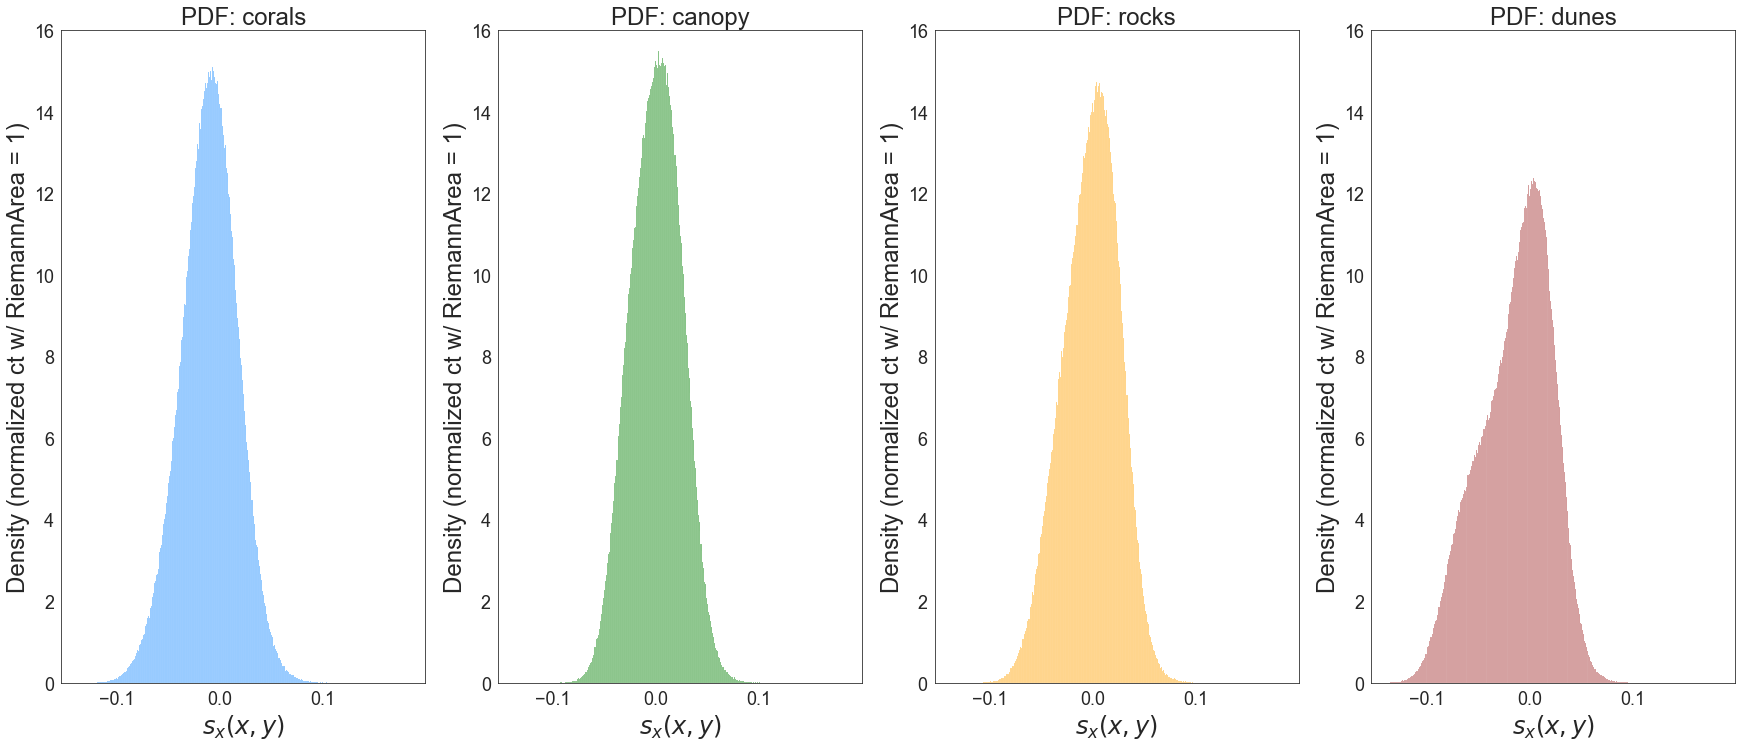

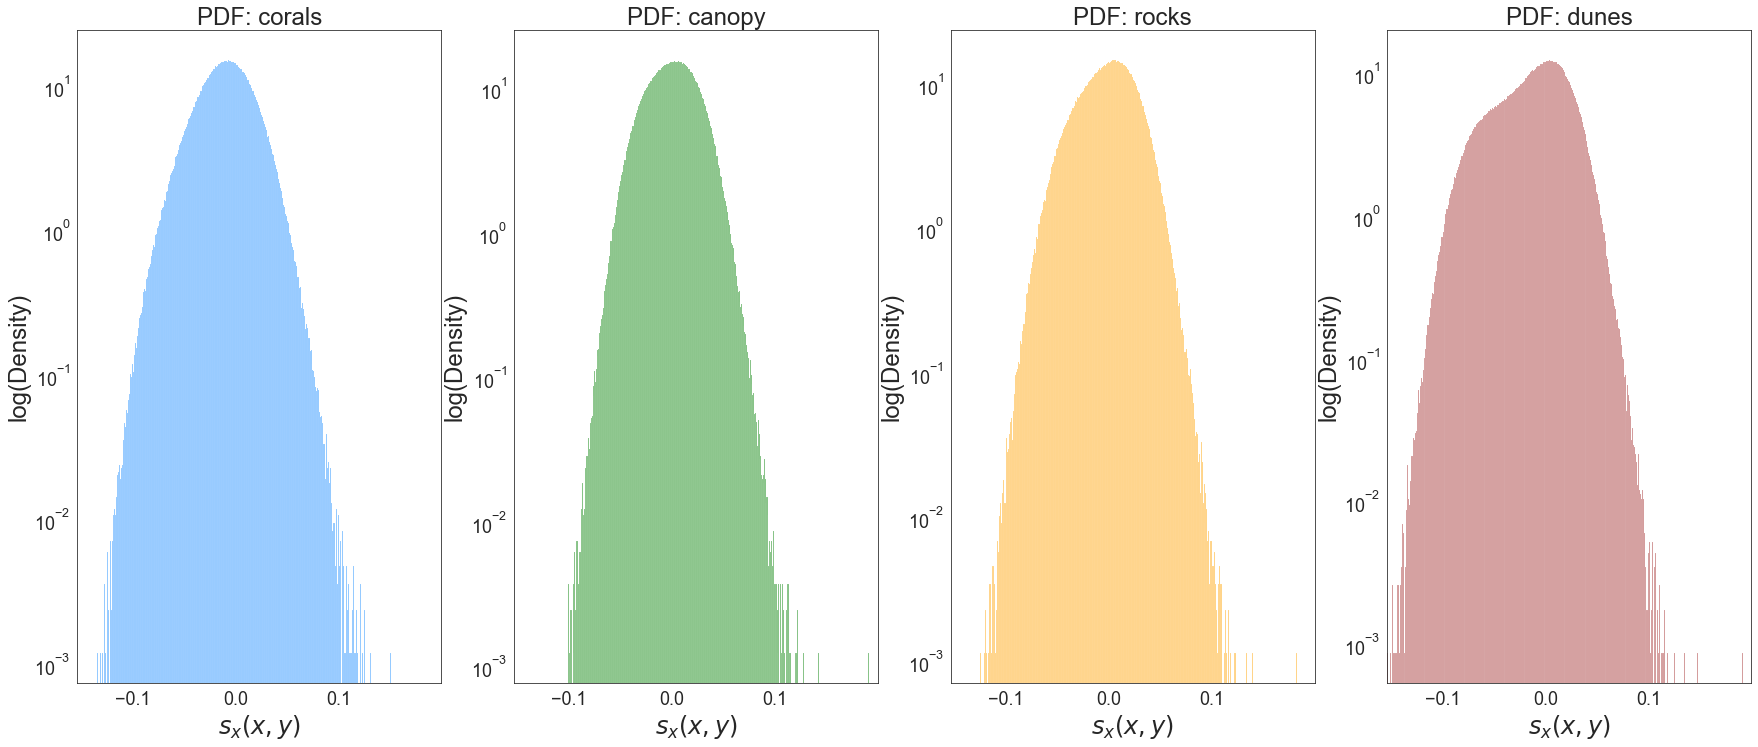

In [46]:
sns.set_style("white")
kwargs = dict({'alpha':.5})

fig = plt.figure(figsize =(30, 12))

for i, BEDFORM in enumerate(BEDFORMS):
    ax0 = fig.add_subplot(1, 4, i+1)
    sns.histplot(sx[BEDFORM], ax=ax0, color = colors[BEDFORM], \
                **kwargs, stat = "density", common_norm=False) #  log_scale=(False, True)
    ax0.set_title('PDF: {}'.format(BEDFORM), fontsize = 24)
    ax0.set_xlabel("$s_x(x,y)$", fontsize = 24)
    ax0.set_ylabel("Density (normalized ct w/ RiemannArea = 1)", fontsize = 24)
    ax0.tick_params(axis='x', labelsize= 18)
    ax0.tick_params(axis='y', labelsize= 18)
    ax0.set_xlim([SX_MIN, SX_MAX])
    ax0.set_ylim([0,16])
plt.show()


fig = plt.figure(figsize =(30, 12))

for i, BEDFORM in enumerate(BEDFORMS):
    ax0 = fig.add_subplot(1, 4, i+1)
    sns.histplot(sx[BEDFORM], ax=ax0, color = colors[BEDFORM], \
                **kwargs, stat = "density", common_norm=False, log_scale=(False, True))
    ax0.set_title('PDF: {}'.format(BEDFORM), fontsize = 24)
    ax0.set_xlabel("$s_x(x,y)$", fontsize = 24)
    ax0.set_ylabel("log(Density)", fontsize = 24)
    ax0.tick_params(axis='x', labelsize= 18)
    ax0.tick_params(axis='y', labelsize= 18)
    ax0.set_xlim([SX_MIN, SX_MAX])
plt.show()

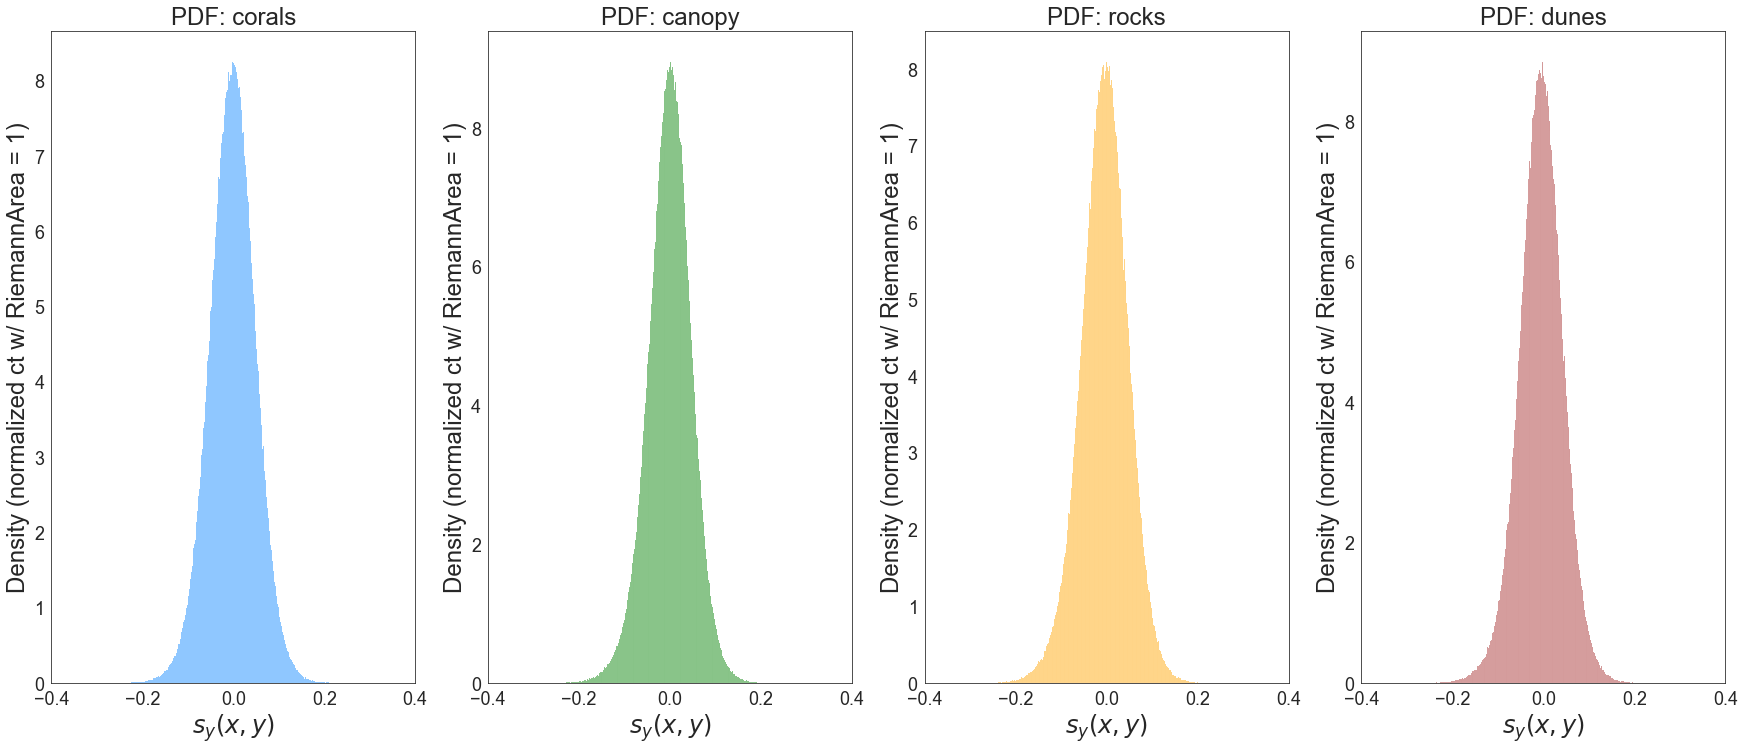

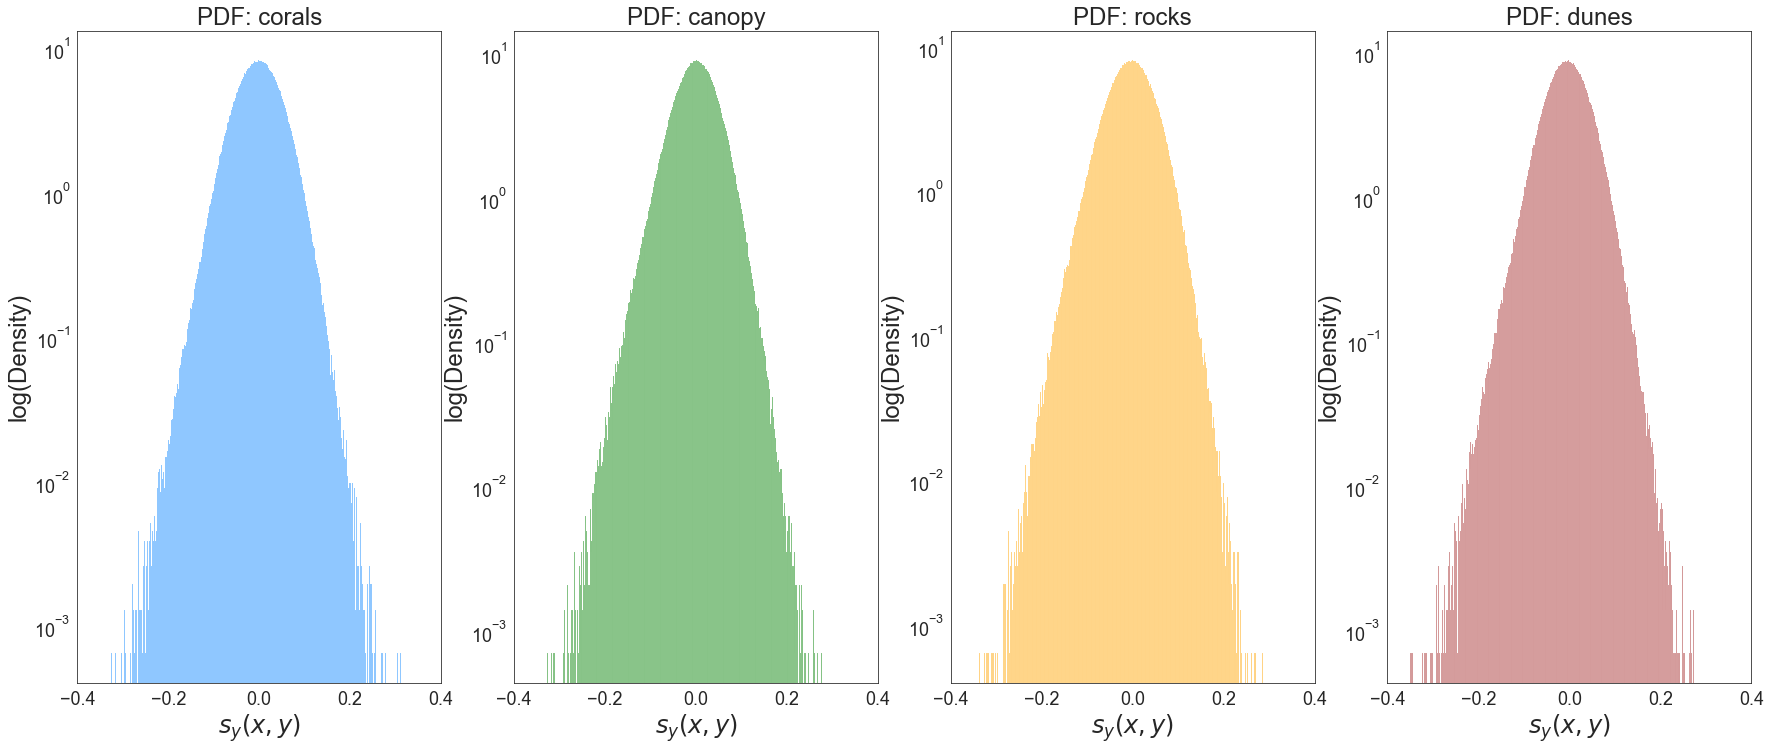

In [50]:
sns.set_style("white")
kwargs = dict({'alpha':.5})

fig = plt.figure(figsize =(30, 12))

for i, BEDFORM in enumerate(BEDFORMS):
    ax0 = fig.add_subplot(1, 4, i+1)
    sns.histplot(sy[BEDFORM], ax=ax0, color = colors[BEDFORM], \
                **kwargs, stat = "density", common_norm=False) #  log_scale=(False, True)
    ax0.set_title('PDF: {}'.format(BEDFORM), fontsize = 24)
    ax0.set_xlabel("$s_y(x,y)$", fontsize = 24)
    ax0.set_ylabel("Density (normalized ct w/ RiemannArea = 1)", fontsize = 24)
    ax0.tick_params(axis='x', labelsize= 18)
    ax0.tick_params(axis='y', labelsize= 18)
    ax0.set_xlim([-.4, 0.4])
plt.show()


fig = plt.figure(figsize =(30, 12))

for i, BEDFORM in enumerate(BEDFORMS):
    ax0 = fig.add_subplot(1, 4, i+1)
    sns.histplot(sy[BEDFORM], ax=ax0, color = colors[BEDFORM], \
                **kwargs, stat = "density", common_norm=False, log_scale=(False, True))
    ax0.set_title('PDF: {}'.format(BEDFORM), fontsize = 24)
    ax0.set_xlabel("$s_y(x,y)$", fontsize = 24)
    ax0.set_ylabel("log(Density)", fontsize = 24)
    ax0.tick_params(axis='x', labelsize= 18)
    ax0.tick_params(axis='y', labelsize= 18)
    ax0.set_xlim([-.4, 0.4])
plt.show()


In [9]:
os.path.exists(pdfCombined_figs_location)

True

In [10]:
plt.savefig(os.path.join(pdfCombined_figs_location, 'combined_PDF.png'), dpi = 80)

<Figure size 432x288 with 0 Axes>